<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Flavio Palacios 

**Fecha:** 10 de Mayo del 2021.

**Expediente** : if729825, 
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 11: Clase 24

## Link de github
[Github](https://github.com/Palacios-F/ProyectoConjunto_FCPalacios)

Realizar la valuación de las opciones barrera para las acciones de Microsoft, siguiendo los siguientes lineamientos:
1. Realizar la valuación para el tipo de opción barrera 'CALL'- down-and-out, usando la suposición de rendimientos normales y usando el método del histograma. Para ambas valuaciones, comparar los resultados de la evaluación obtenida con los resultados obtenidos por la valuación Europea. Como se realizó en clase.
2. Repetir el inciso anterior pero en esta ocasión para el caso de 'PUT'- Up-and-out.

**Nota:** Analice los datos descargados y según el método ya sea `down-and-out` o `Up-and-out` defina un strike price usando la volatility smile vista en la clase de opciones europeas y basado en el spot price y el strike defina una barrera adecuada.

Se habilitará un enlace en canvas para subir un cuaderno de python, con la solución.

**Criterio de revisión.**

> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from datetime import date
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
msft = web.YahooOptions('MSFT')
msft_opt = msft.get_all_data().reset_index()
msft_opt.set_index('Expiry')

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-06-18,65.0,call,MSFT210618C00065000,...,2021-05-05 20:00:02,2021-04-30 14:37:48,"{'contractSymbol': 'MSFT210618C00065000', 'str..."
2021-06-18,65.0,put,MSFT210618P00065000,...,2021-05-05 20:00:02,2021-04-30 16:16:58,"{'contractSymbol': 'MSFT210618P00065000', 'str..."
2021-06-18,70.0,call,MSFT210618C00070000,...,2021-05-05 20:00:02,2021-04-30 13:49:44,"{'contractSymbol': 'MSFT210618C00070000', 'str..."
2021-06-18,70.0,put,MSFT210618P00070000,...,2021-05-05 20:00:02,2021-04-23 16:08:57,"{'contractSymbol': 'MSFT210618P00070000', 'str..."
2022-01-21,70.0,call,MSFT220121C00070000,...,2021-05-05 20:00:02,2021-05-03 19:52:57,"{'contractSymbol': 'MSFT220121C00070000', 'str..."
...,...,...,...,...,...,...,...
2023-01-20,390.0,put,MSFT230120P00390000,...,2021-05-05 20:00:02,2021-04-28 14:05:34,"{'contractSymbol': 'MSFT230120P00390000', 'str..."
2023-03-17,390.0,call,MSFT230317C00390000,...,2021-05-05 20:00:02,2021-05-05 18:45:54,"{'contractSymbol': 'MSFT230317C00390000', 'str..."
2023-03-17,390.0,put,MSFT230317P00390000,...,2021-05-05 20:00:02,2021-04-27 19:22:49,"{'contractSymbol': 'MSFT230317P00390000', 'str..."


## Opción Call

In [3]:
fecha1 = '2021-09-17'
call_f1 = msft_opt.loc[(msft_opt.Expiry== fecha1) & (msft_opt.Type=='call')]
call_f1

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
52,100.0,2021-09-17,call,...,2021-05-05 20:00:02,2021-04-09 15:49:31,"{'contractSymbol': 'MSFT210917C00100000', 'str..."
64,105.0,2021-09-17,call,...,2021-05-05 20:00:02,2021-04-09 16:45:11,"{'contractSymbol': 'MSFT210917C00105000', 'str..."
78,110.0,2021-09-17,call,...,2021-05-05 20:00:02,2021-04-09 15:48:16,"{'contractSymbol': 'MSFT210917C00110000', 'str..."
99,115.0,2021-09-17,call,...,2021-05-05 20:00:02,2021-02-26 20:01:59,"{'contractSymbol': 'MSFT210917C00115000', 'str..."
126,120.0,2021-09-17,call,...,2021-05-05 20:00:02,2021-04-09 16:27:07,"{'contractSymbol': 'MSFT210917C00120000', 'str..."
...,...,...,...,...,...,...,...
1729,355.0,2021-09-17,call,...,2021-05-05 20:00:02,2021-05-04 19:32:36,"{'contractSymbol': 'MSFT210917C00355000', 'str..."
1751,360.0,2021-09-17,call,...,2021-05-05 20:00:02,2021-04-29 16:54:33,"{'contractSymbol': 'MSFT210917C00360000', 'str..."
1787,370.0,2021-09-17,call,...,2021-05-05 20:00:02,2021-04-30 16:42:40,"{'contractSymbol': 'MSFT210917C00370000', 'str..."
1820,380.0,2021-09-17,call,...,2021-05-05 20:00:02,2021-05-04 18:05:35,"{'contractSymbol': 'MSFT210917C00380000', 'str..."


### Underlying Price

In [4]:
call_f1.Underlying_Price.iloc[0]

246.47

### Volatility Smile

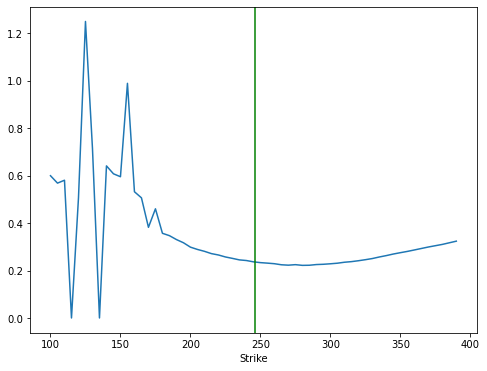

In [5]:
ax = call_f1.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(call_f1.Underlying_Price.iloc[0], color='g');

Si consideramos la sonrisa de volatilidad el punto donde la volatilidad es mínima es aproximadamente por los 280 dolares y ese punto es el que se considerará para el strike de la opción

In [6]:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

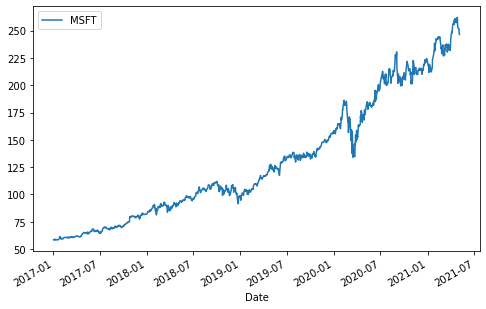

In [7]:
ticker = ['MSFT']
start_date = '2017-01-01'

closes_msft = get_adj_closes(ticker, start_date)
closes_msft.plot(figsize=(8,5));
plt.legend(ticker);

In [8]:
### Calculo de los rendimientos diarios logaritmicos
ret_msft = calc_daily_ret(closes_msft)

In [9]:
K = 280 # strike price
indice_opt = msft_opt.loc[(msft_opt.Type=='call') & (msft_opt.Strike==K) & (msft_opt.Expiry==fecha1)]
indice_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1305,280.0,2021-09-17,call,...,2021-05-05 20:00:02,2021-05-05 18:36:29,"{'contractSymbol': 'MSFT210917C00280000', 'str..."


In [10]:
i_opt= indice_opt.index
opcion_valuar = msft_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'MSFT210917C00280000',
 'strike': 280.0,
 'currency': 'USD',
 'lastPrice': 3.25,
 'change': -0.45000005,
 'percentChange': -12.162163,
 'volume': 23,
 'openInterest': 9330,
 'bid': 3.1,
 'ask': 3.3,
 'contractSize': 'REGULAR',
 'expiration': 1631836800,
 'lastTradeDate': 1620239789,
 'impliedVolatility': 0.2217485052490234,
 'inTheMoney': False}

In [11]:
#### desviación estandar de los rendimientos diarios de la acción
mu = ret_msft.mean()[0]
sigma = ret_msft.std()[0]
sigma,mu

(0.017983725313409405, 0.0013176508099668406)

In [12]:
# Tasa de bonos de 1 yr de fecha 05/05/21 -> 0.06%
r = 0.0006/360 # Tasa diaria

### Simulación con suposición de rendimientos normales

In [13]:
# Encontrar la fecha de hoy en fomato timestamp
today = pd.to_datetime(date.today())

# Obtener fecha de cierre de la opción a valuar
expiry = opcion_valuar.Expiry

# Generar rangos de fechas de días hábiles
dates = pd.date_range(today,expiry,freq = 'B')
ndays = len(dates)

# Número de escenarios
nscen = 100000

# Condición inicial del precio a simular
S0 = closes_msft.iloc[-1,0]

# simular rendimientos
sim_ret =  pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())

In [14]:
# Definir barrera
B = 230
# Crear función indicadora
I = (sim_closes > B).cumprod(axis=0)  > 0
# Definir strike
strike = K

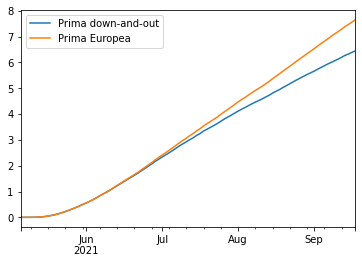

In [15]:
# Prima de una opción Europea
call = pd.DataFrame({'Prima Europea':np.exp(-r*ndays)*np.fmax(sim_closes - strike, 0)
                     .mean(axis=1)},index=dates)

# Prima de una opción barrera
callui = pd.DataFrame({'Prima down-and-out':np.exp(-r*ndays)*(I * np.fmax(sim_closes - strike, 0))
                       .mean(axis=1)},index=dates)

# Resultado de las dos primas previamente valuadas
ax = callui.plot();
call.plot(ax=ax);

In [16]:
call.iloc[-1]

Prima Europea    7.657
Name: 2021-09-17 00:00:00, dtype: float64

In [17]:
callui.iloc[-1]

Prima down-and-out    6.45
Name: 2021-09-17 00:00:00, dtype: float64

### Simulación rendimientos historicos

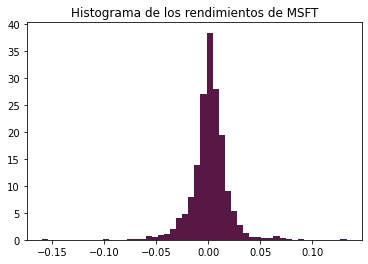

In [18]:
y,x,des = plt.hist(ret_msft,bins=50,density=True,color = '#581845')
plt.title('Histograma de los rendimientos de MSFT')
plt.show()

In [19]:
# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(ret_msft+r-mu, bins=2000)
prob = freq/np.sum(freq)

# Simulación de los rendimientos
ret = np.random.choice(values[1:], ndays*nscen, p=prob)

# Simulación de precios
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_msft.iloc[-1,0]) * np.exp(sim_ret_hist.cumsum())

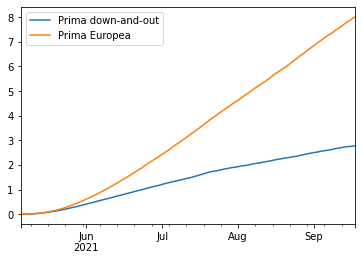

In [20]:
# Prima de una opción Europea
call = pd.DataFrame({'Prima Europea':np.exp(-r*ndays)*np.fmax(sim_closes_hist - strike, 0)
                     .mean(axis=1)},index=dates)

# Prima de una opción barrera
callui = pd.DataFrame({'Prima down-and-out':np.exp(-r*ndays)*(I * np.fmax(sim_closes_hist - strike, 0))
                       .mean(axis=1)},index=dates)

# Resultado de las dos primas previamente valuadas
ax = callui.plot();
call.plot(ax=ax);

In [21]:
call.iloc[-1]

Prima Europea    8.023
Name: 2021-09-17 00:00:00, dtype: float64

In [22]:
callui.iloc[-1]

Prima down-and-out    2.782
Name: 2021-09-17 00:00:00, dtype: float64

## Conclusiones

El valor de la opción europea original tanto con los datos historicos como usando rendimientos normales difieren algo del valor del mercado de la opción posiblemente debido a que que los rendimientos no son lognormales ya que se ve que presentan algo de leptokurtosis o colas gruesas lo que hace que suban los precios muy rapido y por eso esa diferencia. De igual forma esto se transmite a la opción barrera ya que como en el caso del uso de los historicos se esta considerando las colas gruesas hay una mayor volatilidad de los precios que hace que la barrera sea cruzada en una mayor cantidad de veces y lo que se traduce en un costo de prima mucho menor, en ese sentido sería posiblemente más apegado a la realidad debido a que no está limitado por las suposiciones que se hacen para la valuación en el otro caso.

## Opción Put

In [23]:
fecha1 = '2021-09-17'
put_f1 = msft_opt.loc[(msft_opt.Expiry== fecha1) & (msft_opt.Type=='put')]
put_f1

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
53,100.0,2021-09-17,put,...,2021-05-05 20:00:02,2021-05-03 13:33:33,"{'contractSymbol': 'MSFT210917P00100000', 'str..."
65,105.0,2021-09-17,put,...,2021-05-05 20:00:02,2021-05-04 18:46:11,"{'contractSymbol': 'MSFT210917P00105000', 'str..."
79,110.0,2021-09-17,put,...,2021-05-05 20:00:02,2021-04-28 13:41:31,"{'contractSymbol': 'MSFT210917P00110000', 'str..."
100,115.0,2021-09-17,put,...,2021-05-05 20:00:02,2021-04-29 16:34:18,"{'contractSymbol': 'MSFT210917P00115000', 'str..."
127,120.0,2021-09-17,put,...,2021-05-05 20:00:02,2021-04-30 18:08:49,"{'contractSymbol': 'MSFT210917P00120000', 'str..."
...,...,...,...,...,...,...,...
1662,340.0,2021-09-17,put,...,2021-05-05 20:00:02,2021-04-09 19:38:07,"{'contractSymbol': 'MSFT210917P00340000', 'str..."
1685,345.0,2021-09-17,put,...,2021-05-05 20:00:02,2021-02-24 14:39:00,"{'contractSymbol': 'MSFT210917P00345000', 'str..."
1709,350.0,2021-09-17,put,...,2021-05-05 20:00:02,2021-04-28 13:32:49,"{'contractSymbol': 'MSFT210917P00350000', 'str..."
1752,360.0,2021-09-17,put,...,2021-05-05 20:00:02,2021-04-06 17:31:55,"{'contractSymbol': 'MSFT210917P00360000', 'str..."


### Volatility Smile

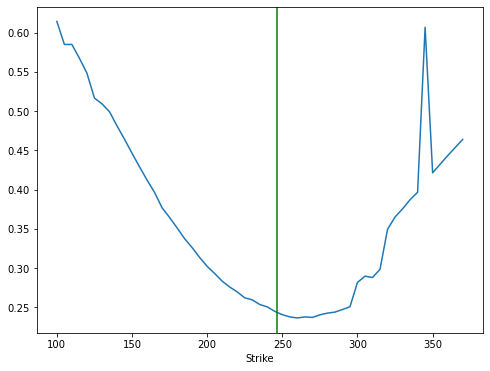

In [24]:
ax = put_f1.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put_f1.Underlying_Price.iloc[0], color='g');

In [25]:
K = 230 # strike price
indice_opt_put = msft_opt.loc[(msft_opt.Type=='put') & (msft_opt.Strike==K) & (msft_opt.Expiry==fecha1)]
indice_opt_put

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
835,230.0,2021-09-17,put,...,2021-05-05 20:00:02,2021-05-05 19:50:04,"{'contractSymbol': 'MSFT210917P00230000', 'str..."


In [26]:
i_optp= indice_opt_put.index
opcion_valuar = msft_opt.loc[i_optp[0]]
opcion_valuar['JSON']

{'contractSymbol': 'MSFT210917P00230000',
 'strike': 230.0,
 'currency': 'USD',
 'lastPrice': 7.95,
 'change': -0.4499998,
 'percentChange': -5.3571405,
 'volume': 329,
 'openInterest': 4329,
 'bid': 7.75,
 'ask': 8.2,
 'contractSize': 'REGULAR',
 'expiration': 1631836800,
 'lastTradeDate': 1620244204,
 'impliedVolatility': 0.259345785522461,
 'inTheMoney': False}

### Simulación con suposición rendimientos normales

In [27]:
# Número de escenarios
nscen = 100000

# Condición inicial del precio a simular
S0 = closes_msft.iloc[-1,0]

# simular rendimientos
sim_ret =  pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())

In [28]:
# Definir barrera
B = 260
# Crear función indicadora
I = (sim_closes < B).cumprod(axis=0)  > 0
# Definir strike
strike = K

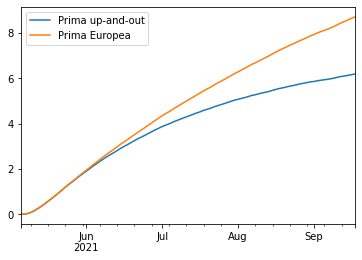

In [29]:
# Prima de una opción Europea
put = pd.DataFrame({'Prima Europea':np.exp(-r*ndays)*np.fmax(strike - sim_closes, 0)
                     .mean(axis=1)},index=dates)

# Prima de una opción barrera
putui = pd.DataFrame({'Prima up-and-out':np.exp(-r*ndays)*(I * np.fmax(strike - sim_closes, 0))
                       .mean(axis=1)},index=dates)

# Resultado de las dos primas previamente valuadas
ax = putui.plot();
put.plot(ax=ax);

In [30]:
put.iloc[-1]

Prima Europea    8.711
Name: 2021-09-17 00:00:00, dtype: float64

In [31]:
putui.iloc[-1]

Prima up-and-out    6.189
Name: 2021-09-17 00:00:00, dtype: float64

### Simulación usando rendimientos historicas

In [32]:
# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(ret_msft+r-mu, bins=2000)
prob = freq/np.sum(freq)

# Simulación de los rendimientos
ret = np.random.choice(values[1:], ndays*nscen, p=prob)

# Simulación de precios
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_msft.iloc[-1,0]) * np.exp(sim_ret_hist.cumsum())

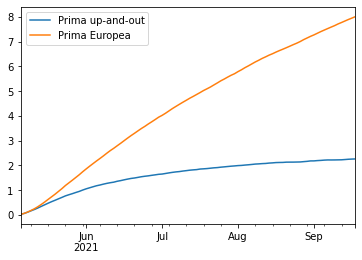

In [33]:
# Prima de una opción Europea
put = pd.DataFrame({'Prima Europea':np.exp(-r*ndays)*np.fmax(strike - sim_closes_hist, 0)
                     .mean(axis=1)},index=dates)

# Prima de una opción barrera
putui = pd.DataFrame({'Prima up-and-out':np.exp(-r*ndays)*(I * np.fmax(strike - sim_closes_hist, 0))
                       .mean(axis=1)},index=dates)

# Resultado de las dos primas previamente valuadas
ax = putui.plot();
put.plot(ax=ax);

In [34]:
put.iloc[-1]

Prima Europea    8.015
Name: 2021-09-17 00:00:00, dtype: float64

In [35]:
putui.iloc[-1]

Prima up-and-out    2.263
Name: 2021-09-17 00:00:00, dtype: float64

## Conclusiones

Para el caso del put se optienen unos resultados similares en cuanto a las diferencias en la valuación de la prima europea pero sobre todo en la diferencia a la hora de evaluar la opción de tipo barrera, finalmente en este caso del put no hubo una gran diferencia entre las valuaciones por la simulación montecarlo y el precio de mercado que debe de ser cercano al precio predicho por la solución a la ecuación de Black Scholes.